# Importing the required libraries

In [1]:
# Helper Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# TensorFlow and tf.keras

import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

print(keras.__version__)

2.11.0
2.11.0


In [3]:
from keras.utils import np_utils
from keras.models import Sequential 
from keras.layers import Dense, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Flatten

In [4]:
from keras.datasets import mnist

# Load the Data

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [6]:
X_train.shape

(60000, 28, 28)

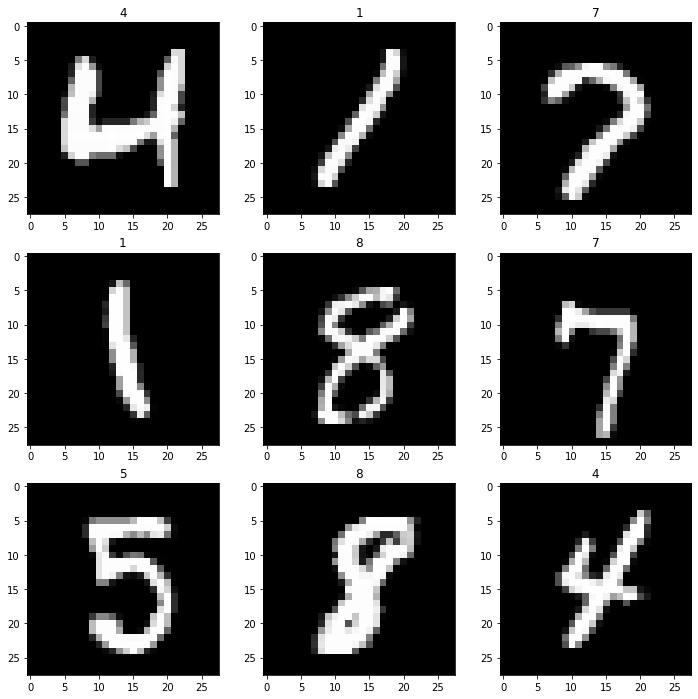

In [7]:
plt.figure(figsize=(12, 12))
np.random.seed(0)
idx = np.random.randint(0, 60000, 9)

for i in range(len(idx)):
    plt.subplot(3, 3, i+1)
    plt.title(y_train[idx[i]])
    grid_data = np.reshape(X_train[idx[i]], (28,28))
    plt.imshow(grid_data, cmap='gray')

In [8]:
X_train.shape

(60000, 28, 28)

# Data Preprocessing

In [9]:
# Type Conversion of Columns
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalization
X_train = X_train/255
X_test = X_test/255

# Adding the channel
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [10]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Building the Model

In [11]:
# STEP-1 Define the Model

model = None
model = Sequential()

# conv3-32
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', input_shape=(28, 28, 1), activation='relu', kernel_initializer='he_normal'))

# conv3-64
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal'))

# Maxpooling
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten
model.add(Flatten())

# FC-128
model.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.5))

# FC-10
model.add(Dense(10, activation='softmax'))


# STEP-2 Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# STEP-3 Fit the Model
model.fit(X_train, Y_train, batch_size=128, epochs=10)


Epoch 1/10
469/469 [==============================] - 16s 10ms/step - loss: 0.2340 - accuracy: 0.9290
Epoch 2/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0841 - accuracy: 0.9756
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0623 - accuracy: 0.9807
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0528 - accuracy: 0.9837
Epoch 5/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0426 - accuracy: 0.9871
Epoch 6/10
469/469 [==============================] - 4s 10ms/step - loss: 0.0386 - accuracy: 0.9879
Epoch 7/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0340 - accuracy: 0.9891
Epoch 8/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0280 - accuracy: 0.9911
Epoch 9/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0286 - accuracy: 0.9903
Epoch 10/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0232 - accur

In [12]:
prediction_score = model.evaluate(X_test, Y_test, verbose=0)

print('Test Loss and Test Accuracy', prediction_score)

Test Loss and Test Accuracy [0.032096538692712784, 0.9911999702453613]


In [22]:
from keras.preprocessing import image
from keras.utils import array_to_img, img_to_array, load_img

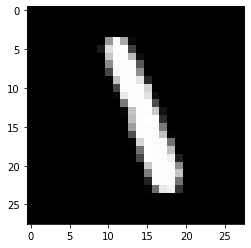

In [16]:
plt.imshow(array_to_img(X_test[46]), cmap="gray")

In [17]:
y_test[46]

1

In [18]:
#####################################################################################

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
def identify_digit(digit):
  dir_path = '/content/drive/MyDrive/Colab Notebooks/data/mnist_imgs/'
  img = load_img(path=dir_path+f"{digit}.PNG", grayscale=True, target_size=(28, 28))
  img = img_to_array(img)
  # plt.imshow(array_to_img(img), cmap="gray")
  img = img.astype('float')/255
  test_img = img.reshape((1, 28, 28, 1))

  # Prediction code for tensorflow version >= 2.6 (latest 2.6.0)
  image_class = model.predict(test_img) 
  prediction = np.argmax(image_class, axis=1)

  # Prediction code for tensorflow version < 2.6
  # img_class = model.predict_classes(test_img)
  # prediction = img_class[0]

  return prediction

In [28]:
identify_digit(8)

1/1 [==============================] - 0s 20ms/step


array([8])